#CA-02: Spam eMail Detection using Naive Bayes Classification Algorithm
#*Alena Sanchez*


# Importing Packages Necessary to Run Algorithm


In [11]:
#import necessary packages for program
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Preparing Data and Building Dictionary of Common Words for Naive Bayes

In [12]:
#This function will clean and prepare the data for the Naive Bayes algorithm.

#FIRST, define Create_Dictionary function with base (root_dir) as only parameter!
def Create_Dictionary(base):
#creates an empty list with for all words in emails to append to
  total_words = []
#Below is a for loop that splits the emails into a list of words!
  email = [os.path.join(base,f) for f in os.listdir(base)]
  for mail in email:
    with open(mail) as m:
      for line in m:
        words = line.split()
#this appends the split words into the empty list (total_words) that was created at the beginning of the function
        total_words += words
#utilizing Counter function to implement and add frequencies of the words in all the emails in the given dataset
  final_dictionary = Counter(total_words)
  list_to_delete = list(final_dictionary)

  for item in list_to_delete:
#.isalpha() == FALSE, to find all the words that contains any numeric characters, so that these words/strings can be removed.
    if item.isalpha() == False:
      del final_dictionary[item]
#if a string/word is only one character it will also remove these items from the list!
    elif len(item) == 1:
      del final_dictionary[item]
#This part of the function creates a dictionary with the 3000 most common words in the emails
#With the .most_common() function it works with the counter to find the most common words in the data
  final_dictionary = final_dictionary.most_common(3000)
  return final_dictionary

In [13]:
#with the dictionary created above we will refernce it to create a 
#a label and word frequecy matrix utilizing an extract function in Python
def extract(mail):
  files = [os.path.join(mail,fi) for fi in os.listdir(mail)]
#The matrix of features is a list of columns that contain independent variables to be processed, including all lines (3000) in the dataset.
  features = np.zeros((len(files),3000))
  training_labels = np.zeros(len(files))
  count = 1;
  docID = 0;
  for fil in files:
    with open(fil) as fi:
      for i, line in enumerate(fi):
        if i ==2:
          words = line.split()
          for word in words:
            wordID = 0
            #where the previous function is referenced
            for i, d in enumerate(final_dictionary):
              if d[0] == word:
                wordID = i
                features[docID,wordID] = words.count(word)
      training_labels[docID] = 0;
      filepathTokens = fil.split('/')
      lastToken = filepathTokens[len(filepathTokens)-1]
#the if-statemnt below distinguishes whether or not an email is SPAM or NOT based on the file name!
      if lastToken.startswith("spmsg"):
        training_labels[docID] = 1;
        count = count + 1
      docID = docID + 1
  #returns features matrix and labels
  return features, training_labels

# Model Development

In [10]:
#code to obtain dataset from google drive
TRAIN = '/content/drive/MyDrive/MSBA-CA02-Spam-Mail-Naibe-Bayes-master/Data/train-mails'
TEST = '/content/drive/MyDrive/MSBA-CA02-Spam-Mail-Naibe-Bayes-master/Data/test-mails'

#calling Create_Dictionary function on the TRAINING emails
final_dictionary = Create_Dictionary(TRAIN)

print ("reading and processing emails from TRAIN and TEST folders")

#running the above function with the TRAINING emails and TESTING emails dataset

features, labels = extract(TRAIN)
test_features, test_labels = extract(TEST)


#Utilizing the Gaussian Method as it is used in classification and it assumes that features
#follow a normal distribution. 
model = GaussianNB()

print ("Training Model using Gaussian Naive Bayes algorithm ...")
model.fit(features, labels)
print ("Training completed")
print ("testing trained model to predict Test Data labels")
predicted_labels = model.predict(test_features)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")
print (accuracy_score(test_labels, predicted_labels))


reading and processing emails from TRAIN and TEST folders
Training Model using Gaussian Naive Bayes algorithm ...
Training completed
testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:
0.9615384615384616


# Prints and Visualizations to Show Understanding

In [14]:
#This displays the training dictionary that was created with our first function! 
#This displays the top 3000 words along with the frequency in which they are seen in the emails (sorted in a DESC order)
#So, most frequent word at the top of the dictionary which appears to be ORDER!

train_dict = Create_Dictionary(TRAIN)
train_dict
#type(train_dict)

[('order', 1414),
 ('address', 1299),
 ('report', 1217),
 ('mail', 1133),
 ('language', 1099),
 ('send', 1080),
 ('email', 1066),
 ('program', 1009),
 ('our', 991),
 ('list', 946),
 ('one', 921),
 ('name', 883),
 ('receive', 826),
 ('free', 801),
 ('money', 797),
 ('work', 756),
 ('information', 684),
 ('business', 669),
 ('please', 657),
 ('university', 600),
 ('us', 567),
 ('day', 559),
 ('follow', 545),
 ('internet', 533),
 ('over', 514),
 ('call', 488),
 ('http', 479),
 ('check', 475),
 ('each', 466),
 ('linguistic', 460),
 ('include', 452),
 ('com', 450),
 ('need', 426),
 ('want', 426),
 ('number', 424),
 ('letter', 420),
 ('many', 412),
 ('here', 400),
 ('market', 398),
 ('start', 390),
 ('even', 388),
 ('fax', 384),
 ('form', 381),
 ('most', 377),
 ('first', 374),
 ('web', 372),
 ('service', 365),
 ('interest', 364),
 ('software', 362),
 ('read', 352),
 ('remove', 349),
 ('week', 346),
 ('those', 346),
 ('credit', 334),
 ('every', 333),
 ('site', 331),
 ('ll', 326),
 ('english',

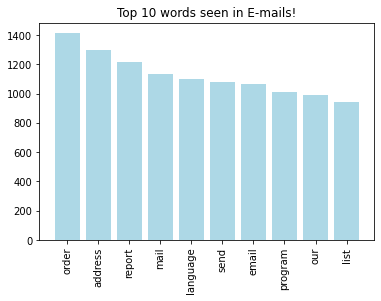

In [15]:
#convert train_dict into dictionary to plot, to show top 10 words seen in all emails!

new = dict(train_dict)

names = list(new.keys())
first_10 = names[0:10]
values = list(new.values())
first_values = values[0:10]

#utilize matplotlib to display the top 10 words seen in the emails
plt.bar(first_10, first_values, color = "lightblue")
plt.xticks(rotation = 90)
plt.title('Top 10 words seen in E-mails!')
plt.show()

In [16]:
#running extract function on the TESTING data set to display ouptuts from function, the feature matrix along with the labels.
extract(TEST)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,